In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {
'A': np.random.randn(100),
'B': np.random.randn(100),
'C': np.random.randn(100)
}

data['A'][::10] = np.nan 
data['B'][::15] = np.nan 
data['C'][::20] = np.nan 

df = pd.DataFrame(data)

print("Original dataset with missing values and noise:")
print(df.head(31))

Original dataset with missing values and noise:
           A         B         C
0        NaN       NaN       NaN
1  -2.191420 -0.740617 -1.027078
2   0.405515  1.895214  1.440973
3  -0.436416 -0.506239  1.325340
4  -0.096486 -0.520432  1.413135
5   0.103402 -0.770328  0.028447
6   0.158182  1.384943 -0.131352
7  -1.231961 -0.811766  0.131799
8  -1.729887  1.624776  0.951228
9  -0.666059  0.327394  1.080059
10       NaN -0.335897 -0.878461
11 -1.608560 -1.548842  0.042385
12  0.207539 -0.612395 -0.428065
13  0.382635 -0.009110 -0.944734
14 -0.135897 -1.982831 -0.823308
15  0.971336       NaN  0.040834
16  0.536238  1.145202  0.743521
17 -0.206241 -2.206763 -1.711380
18  1.086249  1.688157  0.858010
19  1.002152  0.283568  0.641695
20       NaN  1.643530       NaN
21 -0.505441  0.355342  1.351895
22 -1.565906 -0.887016 -0.556833
23 -0.776269  2.706983  0.196073
24  0.119354 -0.601214 -1.369686
25  0.222798 -2.437553  0.210230
26  0.796284  1.364585  0.546367
27  1.684703  0.694107 -0.29

In [6]:
# data = {
# 'A': np.random.randn(100),
# 'B': np.random.randn(100),
# 'C': np.random.randn(100)
# }


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       90 non-null     float64
 1   B       93 non-null     float64
 2   C       95 non-null     float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
skewness = df.skew()
print("\nSkewness before removing outliers using Z-score:")
print(skewness)



Skewness before removing outliers using Z-score:
A   -0.268371
B   -0.053033
C   -0.291877
dtype: float64


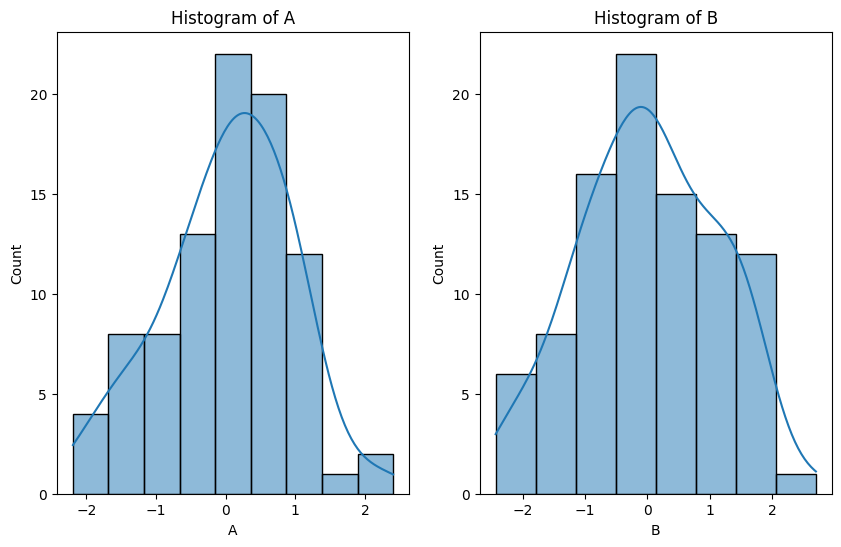

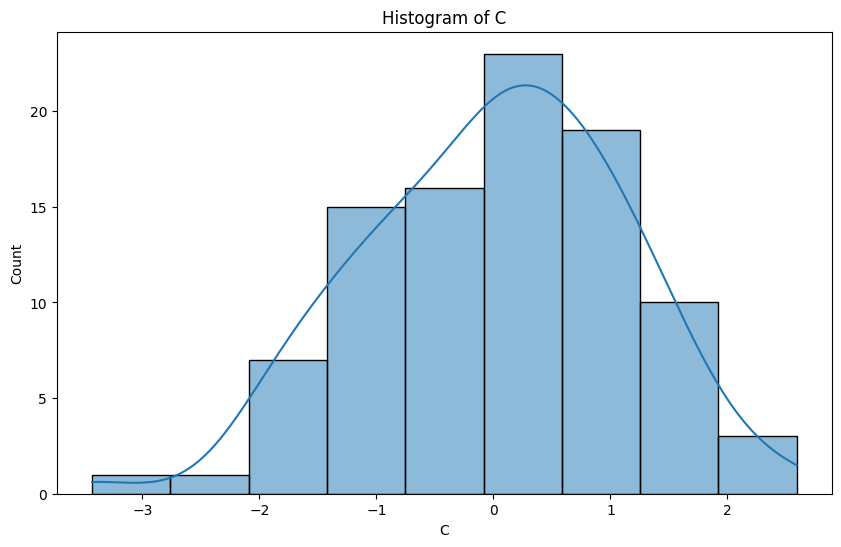

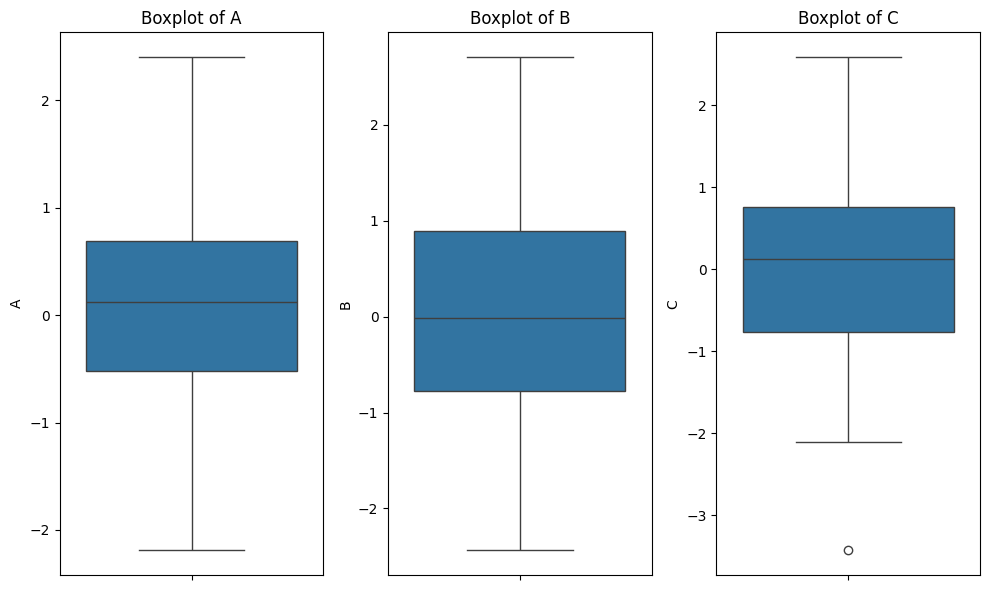

In [6]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['A'], kde=True)
plt.title('Histogram of A')

plt.subplot(1, 2, 2)
sns.histplot(df['B'], kde=True)
plt.title('Histogram of B')

plt.figure(figsize=(10, 6))
sns.histplot(df['C'], kde=True)
plt.title('Histogram of C')
plt.show()

# Plot boxplots
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='A')
plt.title('Boxplot of A')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='B')
plt.title('Boxplot of B')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='C')
plt.title('Boxplot of C')

plt.tight_layout()
plt.show()

In [8]:
# Mean imputation
df_mean_imputed = df.fillna(df.mean())
print("\nDataset after mean imputation:")
print(df_mean_imputed.head(20))

# Median imputation
df_median_imputed = df.fillna(df.median())
print("\nDataset after median imputation:")
print(df_median_imputed.head(20))

# Drop rows with missing values
df_dropped = df.dropna()
print("\nDataset after removing rows with missing values:")
print(df_dropped.head(20))


Dataset after mean imputation:
           A         B         C
0   0.031032  0.024923  0.005058
1  -2.191420 -0.740617 -1.027078
2   0.405515  1.895214  1.440973
3  -0.436416 -0.506239  1.325340
4  -0.096486 -0.520432  1.413135
5   0.103402 -0.770328  0.028447
6   0.158182  1.384943 -0.131352
7  -1.231961 -0.811766  0.131799
8  -1.729887  1.624776  0.951228
9  -0.666059  0.327394  1.080059
10  0.031032 -0.335897 -0.878461
11 -1.608560 -1.548842  0.042385
12  0.207539 -0.612395 -0.428065
13  0.382635 -0.009110 -0.944734
14 -0.135897 -1.982831 -0.823308
15  0.971336  0.024923  0.040834
16  0.536238  1.145202  0.743521
17 -0.206241 -2.206763 -1.711380
18  1.086249  1.688157  0.858010
19  1.002152  0.283568  0.641695

Dataset after median imputation:
           A         B         C
0   0.120362 -0.009110  0.122727
1  -2.191420 -0.740617 -1.027078
2   0.405515  1.895214  1.440973
3  -0.436416 -0.506239  1.325340
4  -0.096486 -0.520432  1.413135
5   0.103402 -0.770328  0.028447
6   0.1581

In [9]:
z_scores = np.abs(stats.zscore(df_mean_imputed))

df_no_outliers_zscore = df_mean_imputed[(z_scores < 3).all(axis=1)]

print("\nDataset after removing outliers using Z-score method:")

print(df_no_outliers_zscore.head(20))





Dataset after removing outliers using Z-score method:
           A         B         C
0   0.031032  0.024923  0.005058
1  -2.191420 -0.740617 -1.027078
2   0.405515  1.895214  1.440973
3  -0.436416 -0.506239  1.325340
4  -0.096486 -0.520432  1.413135
5   0.103402 -0.770328  0.028447
6   0.158182  1.384943 -0.131352
7  -1.231961 -0.811766  0.131799
8  -1.729887  1.624776  0.951228
9  -0.666059  0.327394  1.080059
10  0.031032 -0.335897 -0.878461
11 -1.608560 -1.548842  0.042385
12  0.207539 -0.612395 -0.428065
13  0.382635 -0.009110 -0.944734
14 -0.135897 -1.982831 -0.823308
15  0.971336  0.024923  0.040834
16  0.536238  1.145202  0.743521
17 -0.206241 -2.206763 -1.711380
18  1.086249  1.688157  0.858010
19  1.002152  0.283568  0.641695


In [14]:
Q1 = df_mean_imputed.quantile(0.25)

Q3 = df_mean_imputed.quantile(0.75)

IQR = Q3 - Q1

df_no_outliers_iqr = df_mean_imputed[~((df_mean_imputed < (Q1 - 1.5 * IQR)) 
                        | (df_mean_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataset after removing outliers using IQR method:")
print(df_no_outliers_iqr.head(20))


Dataset after removing outliers using IQR method:
           A         B         C
0   0.031032  0.024923  0.005058
2   0.405515  1.895214  1.440973
3  -0.436416 -0.506239  1.325340
4  -0.096486 -0.520432  1.413135
5   0.103402 -0.770328  0.028447
6   0.158182  1.384943 -0.131352
7  -1.231961 -0.811766  0.131799
8  -1.729887  1.624776  0.951228
9  -0.666059  0.327394  1.080059
10  0.031032 -0.335897 -0.878461
11 -1.608560 -1.548842  0.042385
12  0.207539 -0.612395 -0.428065
13  0.382635 -0.009110 -0.944734
14 -0.135897 -1.982831 -0.823308
15  0.971336  0.024923  0.040834
16  0.536238  1.145202  0.743521
17 -0.206241 -2.206763 -1.711380
18  1.086249  1.688157  0.858010
19  1.002152  0.283568  0.641695
20  0.031032  1.643530  0.005058


In [15]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df



,A,B
0,1,4
1,2,5
2,3,6


In [16]:
df[~(df['A'] == 2)]

,A,B
0,1,4
2,3,6


In [17]:
df

,A,B
0,1,4
1,2,5
2,3,6
